# Dependencies

In [48]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler

# Creating/Cleaning Training Data

In [49]:
training_df = pd.read_csv('training_data.csv', index_col=0)
training_df['Sell'] = ""
sell_classification = ['sell', 'underperform', 'negative']

for index, row in training_df.iterrows():
    ticker = row['Ticker']
    analyst_suggestions = pd.read_csv('../Data_Collection/Scrapers/Final_Analyst_Rating.csv', index_col=0)
    for inner_index, inner_row in analyst_suggestions.iterrows():
        if analyst_suggestions.at[inner_index, 'Ticker'] == ticker:
            if analyst_suggestions.at[inner_index, 'Rating'].lower() in sell_classification:
                training_df.at[index, 'Sell'] = 1
                print(ticker)
                break
            else:
                training_df.at[index, 'Sell'] = 0

# Scaling the data
Scaler = MinMaxScaler()
cols = [x for x in training_df.columns if x not in ['Sell', 'Ticker']]
training_df[cols] = Scaler.fit_transform(training_df[cols])
training_df = training_df.dropna(axis=1)
training_df

PLTR


,Ticker,Conversations,Headlines,regularMarketVolume,profitMargins,52WeekChange,sharesShort,sharesPercentSharesOut,heldPercentInstitutions,heldPercentInsiders,mostRecentQuarter,nextFiscalYearEnd,shortRatio,enterpriseValue,sharesShortPriorMonth,shortPercentOfFloat,pegRatio,Sell
0,NVDA,0.424561,0.892070,0.052327,0.943654,0.184837,0.023123,0.111650,0.765741,0.208158,0.562500,1.000000,0.077273,0.139727,0.034314,0.079612,0.007925,0
1,MSFT,0.729825,0.378855,0.258086,0.996943,0.090959,0.342733,0.021845,0.812448,0.001503,0.078125,0.122449,0.386364,0.841075,0.376497,0.000000,0.010038,0
2,TSLA,0.533333,0.555066,0.331638,0.775201,1.000000,0.363786,1.000000,0.410922,1.000000,0.078125,0.873469,0.490909,0.296855,0.447375,1.000000,0.028119,0
3,AAPL,0.800000,0.665198,1.000000,0.913480,0.163087,0.868672,0.033981,0.645592,0.001804,0.000000,0.481633,0.209091,1.000000,0.804040,0.009709,0.009862,0
4,GOOGL,0.445614,0.389868,0.000000,0.915805,0.135370,0.000000,0.000000,0.927529,0.004660,0.078125,0.873469,0.490909,0.606609,0.000000,0.091262,0.009099,0
5,FB,0.287719,0.387665,0.241268,1.000000,0.136918,0.195104,0.101942,0.920955,0.030216,0.078125,0.873469,0.363636,0.365047,0.184465,0.095146,0.005753,0
6,JNJ,0.473684,0.801762,0.042018,0.885624,0.052244,0.107988,0.029126,0.784342,0.002606,0.125000,0.885714,0.536364,0.193772,0.115055,0.005825,0.016730,0
7,VZ,0.385965,0.563877,0.172179,0.857597,0.012089,0.392770,0.165049,0.736717,0.000000,0.078125,0.873469,0.754545,0.159684,0.352190,0.114563,0.019313,0
8,T,0.638596,0.244493,0.261195,0.737519,0.000000,1.000000,0.281553,0.561657,0.002405,0.078125,0.873469,1.000000,0.179515,1.000000,0.207767,0.028823,0
9,PLTR,0.578947,0.268722,0.393169,0.000000,0.276629,0.474233,0.640777,0.000000,0.652085,0.078125,0.873469,0.000000,0.000000,0.526172,0.520388,0.016848,1


# Training the model

In [50]:
LR = LogisticRegression()
training_cols = [x for x in training_df.columns if x not in ['Sell', 'Ticker']]

X_train = training_df[training_cols]
y_train = training_df['Sell']
y_train = y_train.astype('int')

LR = LR.fit(X_train, y_train)
y_predictions = LR.predict(X_train)

print(classification_report(y_train, y_predictions))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        19
           1       0.00      0.00      0.00         1

    accuracy                           0.95        20
   macro avg       0.47      0.50      0.49        20
weighted avg       0.90      0.95      0.93        20



/Users/venkyramaraju/Downloads/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
data = training_df
data = data.drop(['Ticker'],axis = 1)
X = data.loc[:, data.columns != 'A']
y = data.iloc[:,-1:]
y = y.astype('int')

# Feature Selection

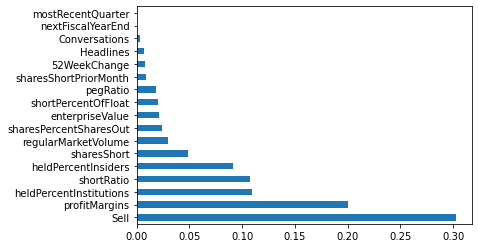

In [52]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X, y.values.ravel())
feat_importances = pd.Series(model.feature_importances_, index = X.columns)
feat_importances.nlargest(24).plot(kind = 'barh')
plt.show()